# Logistic Regression

In this exercise, you are to implement logistic regression and then apply it on a datasets. 

The task is to build a model that gives an applicant's probability of admission based on the scores from 2 exams.

## 1 Load in the data and Visualize
The first step is to load in the dataset and visualize it. However, we need to import some important libraries and define some functions before doing that.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# function: creates a scatter plot of the examples
def plotData(data, label_x, label_y, label_pos, label_neg, axes=None):
    # Get indexes for class 0 and class 1
    neg = data[:,2] == 0
    pos = data[:,2] == 1
    
    # If no specific axes object has been passed, get the current axes.
    if axes == None:
        axes = plt.gca()
    axes.scatter(data[pos][:,0], data[pos][:,1], marker='+', c='k', s=60, linewidth=2, label=label_pos)
    axes.scatter(data[neg][:,0], data[neg][:,1], c='y', s=60, label=label_neg)
    axes.set_xlabel(label_x)
    axes.set_ylabel(label_y)
    axes.legend(frameon= True, fancybox = True);

Load the dataset

In [3]:
data = pd.read_csv('data/ex2data1.txt', names=['x1','x2','y'])
X = np.asarray(data[["x1","x2"]])
y = np.asarray(data["y"])

Now let's visualize the data

In [4]:
data.head()

,x1,x2,y
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [5]:
data.shape

(100, 3)

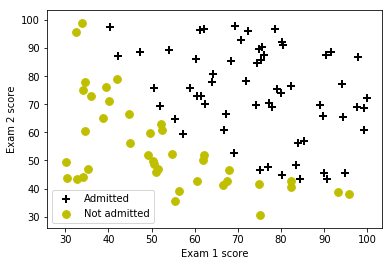

In [6]:
plotData(data.values, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')

In [7]:
# add x0 to the feature matrix
X = np.hstack((np.ones_like(y)[:,None],X))
y = y.reshape(-1,1)

## 2 Implementation
### 2.1 Sigmoid function
In this part of the exercise, you are to implement the sigmoid function. Hypothesis for logistic regression is espressed as:

$$h_\theta(x) = g(\theta^Tx)$$

where $g$ is the sigmoid function defined as:
$$g(z) = \frac{1}{1+e^{-z}}$$

Your task now is to implement the sigmoid function in the code cell below

In [8]:
def sigmoid(z):
    
    result = None
    ############ START CODE ##############
    
    
    result = (1 / (1 + np.exp(-z)))
    
    ########### END CODE #################
    
    return result

### 2.2 Cost function and gradient

Now, your next task is to implement the cost function and gradient
$$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big]$$



In [9]:
def costFunction(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = None
    
    ########### START CODE ################
    
    J = (-1*(1/m)*(np.log(h).T.dot(y)+np.log(1-h).T.dot(1-y)))[0]
               
    ########### END CODE ##################
    return J

Next, you are to implement the gradient of the cost function
#### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} $$ 

In [10]:
def gradient(theta, X, y):
    m = y.size
    h = sigmoid(X.dot(theta.reshape(-1,1)))
    
    grad =(1/m)*X.T.dot(h-y)

    return(grad.flatten())

You are now to test your implementation of the cost function and gradient

In [11]:
initial_theta = np.zeros(X.shape[1])
cost = costFunction(initial_theta, X, y)
grad = gradient(initial_theta, X, y)
print('Cost: \n', cost)
print('Grad: \n', grad.shape)

Cost: 
 0.6931471805599452
Grad: 
 (3,)


Cost should be: <br/> 0.6931471805599453<br/>
Grad: <br/>
 [ -0.1        -12.00921659 -11.26284221]

Previously, you found optimized the cost function to obtain the optimal parameters using your implementation of gradient descent. This time, you will use an advanced optimization function from scipy, `minimize`.

In [12]:
from scipy.optimize import minimize

In [13]:
res = minimize(costFunction, initial_theta, args=(X,y), method=None, jac=gradient, options={'maxiter':400})


/Users/sens3i/anaconda3/envs/tf/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log
  if __name__ == '__main__':


### 2.3 Evaluating logistic regression

After learning the model parameters, you can now use the model to make predictions. So, let's predict the admssion probability for a student with an Exam 1 score of 45 and Exam 2 score of 85.

In [14]:
res.x

array([-25.16133284,   0.2062317 ,   0.2014716 ])

In [15]:
prob = None

########  START CODE #######

z = res.x[0] + res.x[1]*45 + res.x[2]*85
h = sigmoid(z)

prob = h

######## END CODE #########
print('admission probability is: ', prob)

admission probability is:  0.7762907240588947


The Admission probability should be 0.776

We can now evaluate the quality of the learned parameters by observing how well the model performs on the training set. This is done by making predictions on the training set and computing the accuracy of the model. The model's accuracy is the fraction of predictions it got right. Complete the code in the cell below to make predictions on a dataset

In [16]:
def predict(theta, X, threshold=0.5):
    
    ############## START CODE ##################
    
    p = sigmoid(X.dot(theta.T)) >= threshold
    
    
    ############# END CODE ####################
    return(p.astype('int'))

Now we compute the train accurracy

In [17]:
p = predict(res.x, X) 
print('Train accuracy {}%'.format(100*sum(p == y.ravel())/p.size))

Train accuracy 89.0%


#### Decision boundary plot

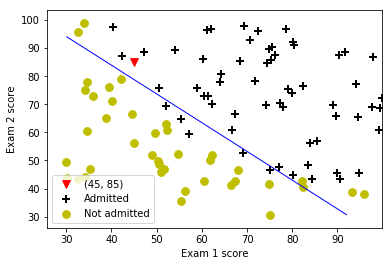

In [18]:
plt.scatter(45, 85, s=60, c='r', marker='v', label='(45, 85)')
plotData(data.values, 'Exam 1 score', 'Exam 2 score', 'Admitted', 'Not admitted')
x1_min, x1_max = X[:,1].min(), X[:,1].max(),
x2_min, x2_max = X[:,2].min(), X[:,2].max(),
xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
h = sigmoid(np.c_[np.ones((xx1.ravel().shape[0],1)), xx1.ravel(), xx2.ravel()].dot(res.x))
h = h.reshape(xx1.shape)
plt.contour(xx1, xx2, h, [0.5], linewidths=1, colors='b')

# Regularized logistic regression

In this part of the exercise, you will implement regularized logistic regression
to predict whether microchips from a fabrication plant passes quality assurance (QA). You are to do this using results from 2 tests.



## 1 Visualizing the data

In [19]:
data2 = pd.read_csv('data/ex2data2.txt', names=['x1','x2','y'])
X = np.asarray(data2[["x1","x2"]])
y = np.asarray(data2["y"])

In [20]:
data2.shape

(118, 3)

In [21]:
data2.sample(5)

,x1,x2,y
6,-0.39804,0.034357,1
87,-0.69758,0.684940,0
82,-0.40956,-0.411550,0
85,-0.69758,0.041667,0
44,0.62730,0.158630,1


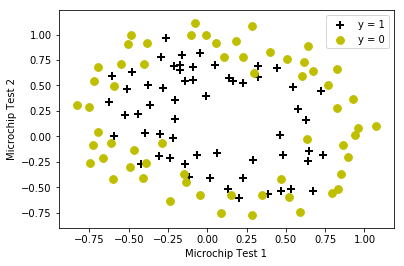

In [22]:
plotData(data2.values, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0')

## 2 Feature mapping

In order to fit the data better, more features have to be created.

In [23]:
from sklearn.preprocessing import PolynomialFeatures

In [24]:
X.shape

(118, 2)

In [25]:
mapping = PolynomialFeatures(6)
X_mapped = mapping.fit_transform(X)
X_mapped.shape

(118, 28)

## 3 Cost function and gradient descent

You are now to implement code to compute the cost function and its gradient for regularized logistic regression

##### Regularized Cost Function
##### $$ J(\theta) = \frac{1}{m}\sum_{i=1}^{m}\big[-y^{(i)}\, log\,( h_\theta\,(x^{(i)}))-(1-y^{(i)})\,log\,(1-h_\theta(x^{(i)}))\big] + \frac{\lambda}{2m}\sum_{j=1}^{n}\theta_{j}^{2}$$


In [26]:
def costFunctionReg(theta, X, y, reg):
    m = y.size
    h = sigmoid(X.dot(theta))
    
    J = -1*(1/m)*(np.log(h).T.dot(y) + np.log(1-h).T.dot(1-y)) + (reg/(2*m))*np.sum(np.square(theta[1:]))
    #print(J.shape)
    
    return(J)


##### gradient
# 
##### $$ \frac{\delta J(\theta)}{\delta\theta_{j}} = \frac{1}{m}\sum_{i=1}^{m} ( h_\theta (x^{(i)})-y^{(i)})x^{(i)}_{j} + \frac{\lambda}{m}\theta_{j}$$ 


In [27]:
def gradientReg(theta,X, y, reg):
    m = y.size
    h = sigmoid(X.dot(theta))
      
    grad = (1/m)*X.T.dot(h-y) + (reg/m)*theta  #+ (reg/m)*np.r_[[[0]],theta[1:].reshape(-1,1)]
        
    return(grad.flatten())

In [28]:
initial_theta = np.zeros(X_mapped.shape[1])
costFunctionReg(initial_theta, X_mapped, y, 1)
gradientReg(initial_theta,X_mapped, y, 1).shape



(28,)

In [29]:
res2 = minimize(costFunctionReg, initial_theta, args=(X_mapped, y, 1), method=None, jac=gradientReg, options={'maxiter':3000})

In [30]:
from scipy.optimize import minimize

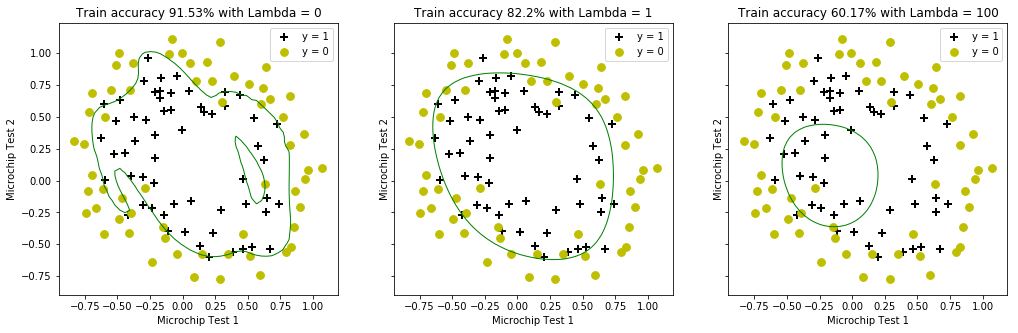

In [31]:
fig, axes = plt.subplots(1,3, sharey = True, figsize=(17,5))

# Decision boundaries
# Lambda = 0 : No regularization --> too flexible, overfitting the training data
# Lambda = 1 : Looks about right
# Lambda = 100 : Too much regularization --> high bias

for i, C in enumerate([0, 1, 100]):
    # Optimize costFunctionReg
    res2 = minimize(costFunctionReg, initial_theta, args=(X_mapped, y, C), method=None, jac=gradientReg, options={'maxiter':3000})
    
    # Accuracy
    accuracy = 100*sum(predict(res2.x, X_mapped) == y.ravel())/y.size    

    # Scatter plot of X,y
    plotData(data2.values, 'Microchip Test 1', 'Microchip Test 2', 'y = 1', 'y = 0', axes.flatten()[i])
    
    # Plot decisionboundary
    x1_min, x1_max = X[:,0].min(), X[:,0].max(),
    x2_min, x2_max = X[:,1].min(), X[:,1].max(),
    xx1, xx2 = np.meshgrid(np.linspace(x1_min, x1_max), np.linspace(x2_min, x2_max))
    h = sigmoid(mapping.fit_transform(np.c_[xx1.ravel(), xx2.ravel()]).dot(res2.x))
    h = h.reshape(xx1.shape)
    axes.flatten()[i].contour(xx1, xx2, h, [0.5], linewidths=1, colors='g');       
    axes.flatten()[i].set_title('Train accuracy {}% with Lambda = {}'.format(np.round(accuracy, decimals=2), C))